# Derin Öğrenme ve Diğer Makine Öğrenme Modelleri

Proje **[linki](https://www.kaggle.com/datasets/uciml/mushroom-classification)**

In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-classification/mushrooms.csv


### Proje amacı

**1. En iyi sonucu veren makine öğrenmesi modelini bulun.**

> K-Nearest Neighbors(KNN), Decision Tree, Random Forest, Gradient Boost ve Derin öğrenme en iyi performans sergileyen modeller

**2. Bir mantarın zehirli olmasında en belirleyici özelliği bulun**

> ring-type ve gill-size mantar özelliklerinin bir mantarın zehirli olmasında en belirleyicidir.

#### Gerekli kütüphanelerin çağırılması ve verinin yüklenmesi

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv("/kaggle/input/mushroom-classification/mushrooms.csv")

In [46]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [48]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [49]:
df.corr() # sayısal veriler olmadığından korelasyon bulunmadı.

""


In [50]:
aziz = df[df.columns[0]].value_counts()
aziz.index

Index(['e', 'p'], dtype='object')

In [51]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [52]:
len(df)

8124

In [53]:
for i in range(len(df.columns)):
    print(df.columns[i])
    aziz = df[df.columns[i]].value_counts()
    print(aziz)
    print("-"*35)

class
e    4208
p    3916
Name: class, dtype: int64
-----------------------------------
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
-----------------------------------
cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
-----------------------------------
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
-----------------------------------
bruises
f    4748
t    3376
Name: bruises, dtype: int64
-----------------------------------
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
-----------------------------------
gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64
-----------------------------------
gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64
-----------------------------------
gill-size
b    5612
n 

In [54]:
aziz

d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64

In [55]:
aziz.index

Index(['d', 'g', 'p', 'l', 'u', 'm', 'w'], dtype='object')

In [56]:
aziz.index[0]

'd'

In [57]:
df[df.columns[22]] = df[df.columns[22]].replace(aziz.index[2],0)

In [58]:
df[df.columns[22]].value_counts()

d    3148
g    2148
0    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64

In [59]:
for i in range(len(df.columns)):
    print(df.columns[i])
    aziz = df[df.columns[i]].value_counts()
    print(len(aziz.index))
    for j in range(len(aziz.index)):
        df[df.columns[i]] = df[df.columns[i]].replace(aziz.index[j],j)
    print(aziz.index)

class
2
Index(['e', 'p'], dtype='object')
cap-shape
6
Index(['x', 'f', 'k', 'b', 's', 'c'], dtype='object')
cap-surface
4
Index(['y', 's', 'f', 'g'], dtype='object')
cap-color
10
Index(['n', 'g', 'e', 'y', 'w', 'b', 'p', 'c', 'u', 'r'], dtype='object')
bruises
2
Index(['f', 't'], dtype='object')
odor
9
Index(['n', 'f', 'y', 's', 'a', 'l', 'p', 'c', 'm'], dtype='object')
gill-attachment
2
Index(['f', 'a'], dtype='object')
gill-spacing
2
Index(['c', 'w'], dtype='object')
gill-size
2
Index(['b', 'n'], dtype='object')
gill-color
12
Index(['b', 'p', 'w', 'n', 'g', 'h', 'u', 'k', 'e', 'y', 'o', 'r'], dtype='object')
stalk-shape
2
Index(['t', 'e'], dtype='object')
stalk-root
5
Index(['b', '?', 'e', 'c', 'r'], dtype='object')
stalk-surface-above-ring
4
Index(['s', 'k', 'f', 'y'], dtype='object')
stalk-surface-below-ring
4
Index(['s', 'k', 'f', 'y'], dtype='object')
stalk-color-above-ring
9
Index(['w', 'p', 'g', 'n', 'b', 'o', 'e', 'c', 'y'], dtype='object')
stalk-color-below-ring
9
Index(['w',

In [60]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0,1,0,1,6,0,0,1,7,...,0,0,0,0,0,0,0,2,2,4
1,0,0,1,3,1,4,0,0,0,7,...,0,0,0,0,0,0,0,1,3,1
2,0,3,1,4,1,5,0,0,0,3,...,0,0,0,0,0,0,0,1,3,5
3,1,0,0,4,1,6,0,0,1,3,...,0,0,0,0,0,0,0,2,2,4
4,0,0,1,1,0,0,0,1,0,7,...,0,0,0,0,0,0,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,2,1,0,0,0,1,0,0,9,...,0,5,5,0,2,0,0,8,5,3
8120,0,0,1,0,0,0,1,0,0,9,...,0,5,5,0,1,0,0,8,0,3
8121,0,1,1,0,0,0,1,0,0,3,...,0,5,5,0,2,0,0,8,5,3
8122,1,2,0,0,0,2,0,0,1,0,...,1,0,0,0,0,0,1,0,0,3


In [80]:
df.corr()["class"].sort_values(ascending=False)

class                       1.000000
ring-type                   0.556515
gill-size                   0.540024
odor                        0.323569
stalk-surface-above-ring    0.323350
stalk-surface-below-ring    0.182342
stalk-color-below-ring      0.133722
stalk-color-above-ring      0.133658
stalk-shape                 0.102019
cap-color                   0.011735
habitat                    -0.001970
spore-print-color          -0.025285
cap-shape                  -0.034451
veil-color                 -0.120766
gill-attachment            -0.129200
ring-number                -0.152261
cap-surface                -0.159155
stalk-root                 -0.248390
gill-color                 -0.334999
gill-spacing               -0.348387
population                 -0.446307
bruises                    -0.501530
veil-type                        NaN
Name: class, dtype: float64

**Yukarıdaki çıktıya göre 2. sorunun cevabı olarak ring-type ve gill-size mantar özelliklerinin bir mantarın zehirli olmasında en belirleyici olduklarını belirlemiş olduk.**

## Makine Öğrenmesi Modelleri

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [84]:
aziz = list(df.corr()[(df.corr()["class"]>.2) & (df.corr()["class"]<1)]["class"].sort_values(ascending=False).index)

In [85]:
x = df[aziz]
y = df["class"]

In [86]:
x.head()

,ring-type,gill-size,odor,stalk-surface-above-ring
0,0,1,6,0
1,0,0,4,0
2,0,0,5,0
3,0,1,6,0
4,1,0,0,0


In [87]:
y[:10]

0    1
1    0
2    0
3    1
4    0
5    0
6    0
7    0
8    1
9    0
Name: class, dtype: int64

In [88]:
def classification_test(x,y):
    
    g = GaussianNB()
    b = BernoulliNB()
    k = KNeighborsClassifier()
    l = LogisticRegression()
    d = DecisionTreeClassifier()
    r = RandomForestClassifier()
    gb = GradientBoostingClassifier()
    
    
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state=42)
    
    aziz_models = [g, b, k, l, d, r, gb]
    aziz_names = ["Gaussian Naive Bayes", "Bernoulli Naive Bayes", "K-Nearest Neighbors(KNN)", "Logistic Regression",
                 "Decision Tree", "Random Forest", "Gradient Boost"]
    
    accuracy = []
    precision = []
    recall = []
    f_score = []
    
    
    result = pd.DataFrame(columns = ["Accuracy", "Precision", "Recall", "F_Score"], index = aziz_names)
    
    for aziz in aziz_models:
        aziz.fit(x_train, y_train)
        az = aziz.predict(x_test)
        
        TP = confusion_matrix(az, y_test)[1][1]
        FN = confusion_matrix(az, y_test)[1][0]
        FP = confusion_matrix(az, y_test)[0][1]
        
        accuracy.append(accuracy_score(az, y_test))
        P = TP/(TP+FP)
        R = TP/(TP+FN)
        F1 = 2*P*R/(P+R)
        
        precision.append(P)
        recall.append(R)
        f_score.append(F1)
    
    
    result.Accuracy = accuracy
    result.Precision = precision
    result.Recall = recall
    result.F_Score = f_score
    
    return result.sort_values("Accuracy", ascending = False)

In [89]:
classification_test(x,y)
# İlk 4 model en iyi performansı gösterdi. Derin öğrenme de bu ilk 4 modelle benzer performansa sahip.

,Accuracy,Precision,Recall,F_Score
K-Nearest Neighbors(KNN),0.991137,0.981837,1.000000,0.990835
Decision Tree,0.991137,0.981837,1.000000,0.990835
Random Forest,0.991137,0.981837,1.000000,0.990835
Gradient Boost,0.991137,0.981837,1.000000,0.990835
Bernoulli Naive Bayes,0.957164,0.949546,0.962168,0.955815
Logistic Regression,0.927622,0.906155,0.943277,0.924344
Gaussian Naive Bayes,0.913343,0.908174,0.913706,0.910931


### Derin Öğrenmeyle Bu Veriyi Değerlendirelim

#### Derin öğrenme için gerekli kütüphaneleri çağıralım

In [90]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization

#### Modelimizi oluşturup değerlendirelim

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.80, random_state=42)

In [100]:
model=Sequential()
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128,activation='relu'))
model.add(layers.Dropout(0.4))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))
model.compile(loss="binary_crossentropy",optimizer='adam',metrics='accuracy')

In [102]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=1500, batch_size=256, verbose=1)

Epoch 1/1500
26/26 [==============================] - 0s 10ms/step - loss: 0.0434 - accuracy: 0.9900 - val_loss: 0.0408 - val_accuracy: 0.9908
Epoch 2/1500
26/26 [==============================] - 0s 10ms/step - loss: 0.0435 - accuracy: 0.9900 - val_loss: 0.0408 - val_accuracy: 0.9908
Epoch 3/1500
26/26 [==============================] - 0s 10ms/step - loss: 0.0430 - accuracy: 0.9900 - val_loss: 0.0409 - val_accuracy: 0.9908
Epoch 4/1500
26/26 [==============================] - 0s 10ms/step - loss: 0.0448 - accuracy: 0.9898 - val_loss: 0.0409 - val_accuracy: 0.9908
Epoch 5/1500
26/26 [==============================] - 0s 9ms/step - loss: 0.0435 - accuracy: 0.9900 - val_loss: 0.0413 - val_accuracy: 0.9908
Epoch 6/1500
26/26 [==============================] - 0s 10ms/step - loss: 0.0430 - accuracy: 0.9900 - val_loss: 0.0414 - val_accuracy: 0.9908
Epoch 7/1500
26/26 [==============================] - 0s 10ms/step - loss: 0.0434 - accuracy: 0.9900 - val_loss: 0.0415 - val_accuracy: 0.9908


In [103]:
model.evaluate(x_train,y_train)

204/204 [==============================] - 0s 2ms/step - loss: 0.0428 - accuracy: 0.9900


[0.0427844412624836, 0.989998459815979]

In [104]:
model.evaluate(x_test,y_test)

51/51 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 0.9908


[0.0410265251994133, 0.9907692074775696]

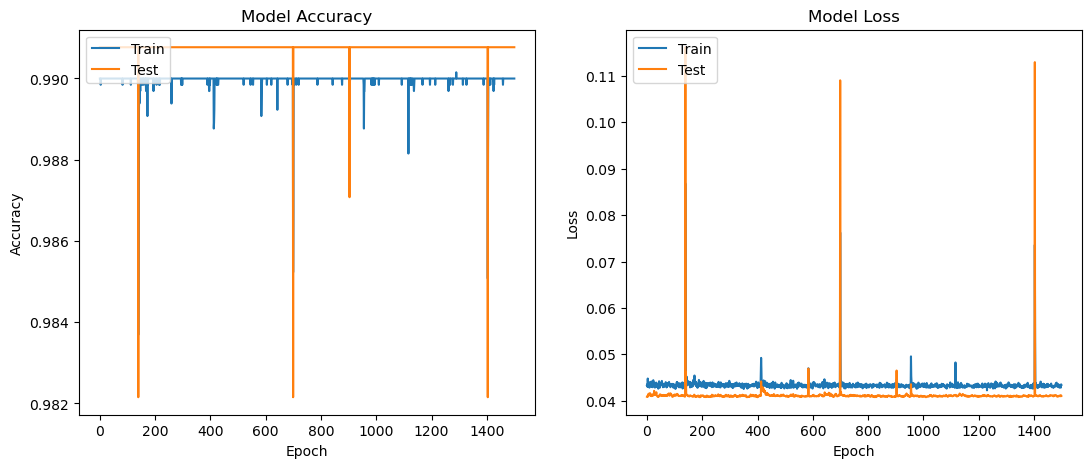

In [105]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"], loc="upper left")

plt.subplot(1,3,2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Test"], loc="upper left")
plt.show();